### 앙상블 랜덤 포레스트

RandomForestClassifier(n_estimators=5, random_state=2)

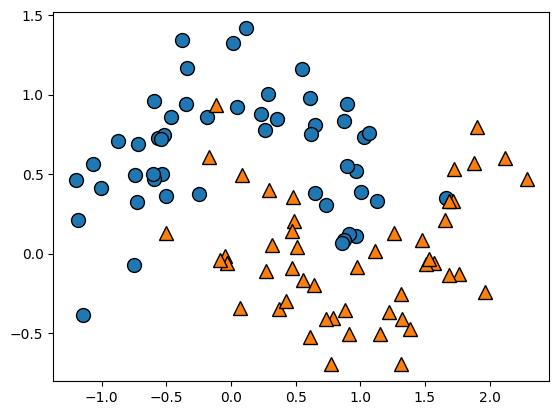

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

# make_moons: 분류용 가상 데이터 생성
# noise: 가우시안 노이즈, X: shape(n_samples,2), y: shape(n_samples,)
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# 가상 데이터 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# forest classifier 생성
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 만들어진 트리는 estimators_에 저장됨

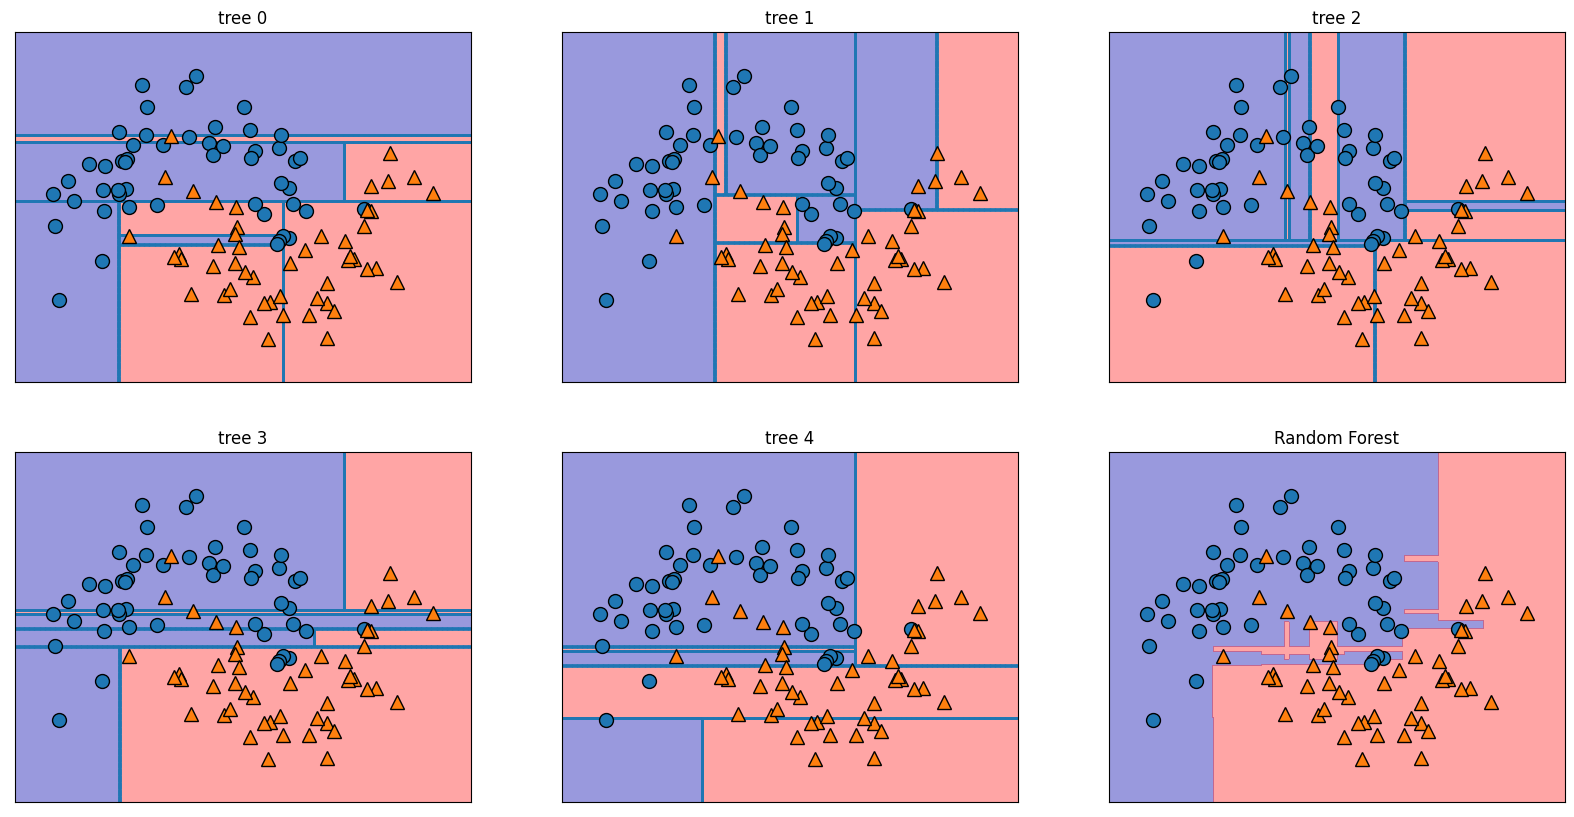

In [7]:
# 랜덤한 결정 트리의 예측 확률 시각화

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

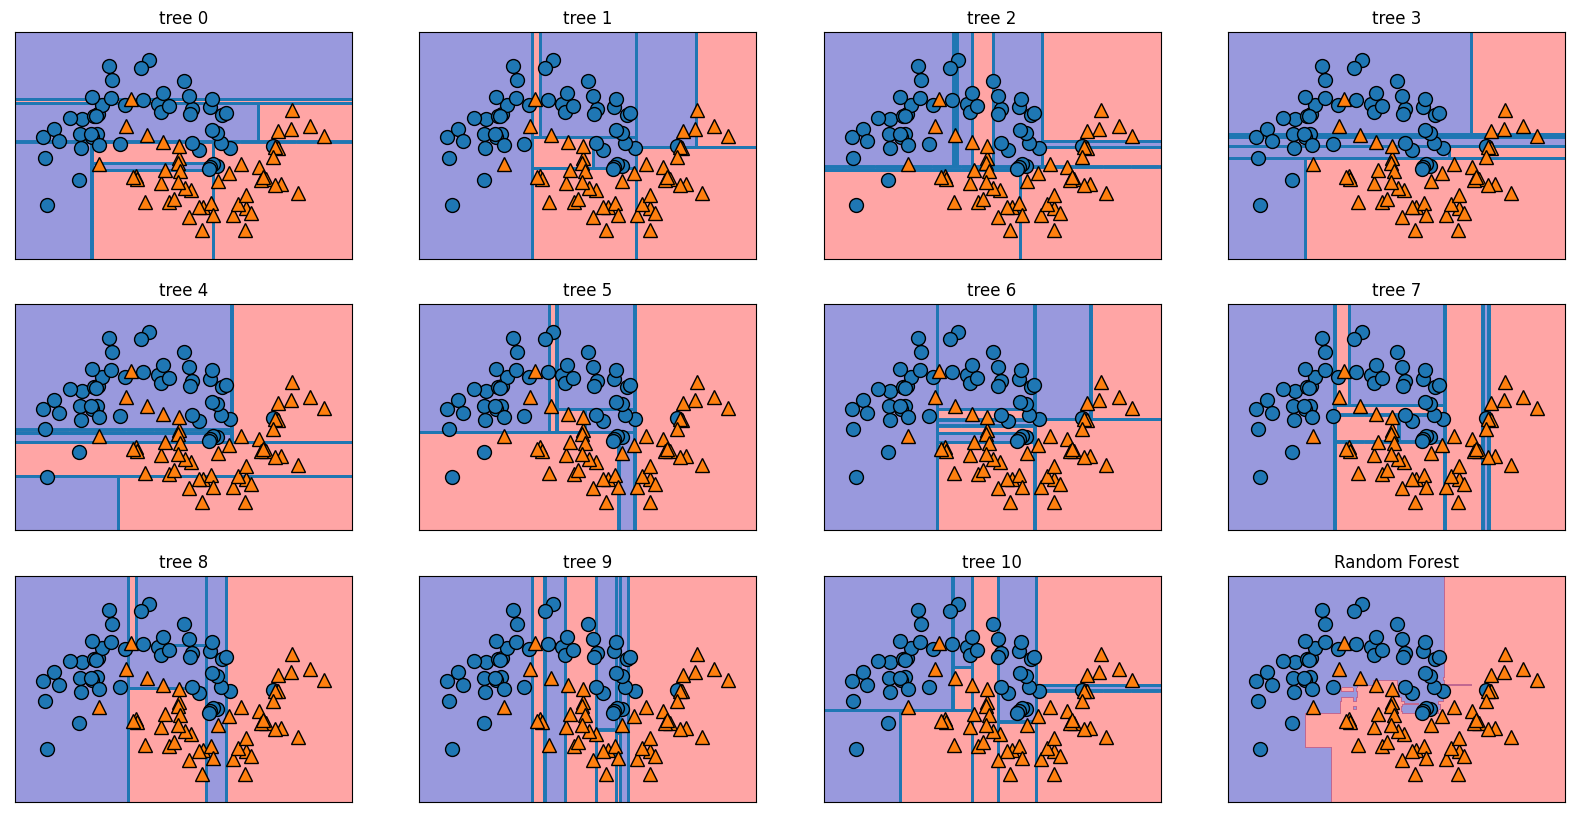

In [8]:
# n_estimators = 11
forest = RandomForestClassifier(n_estimators=11, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 결정 경계가 더 부드러워짐

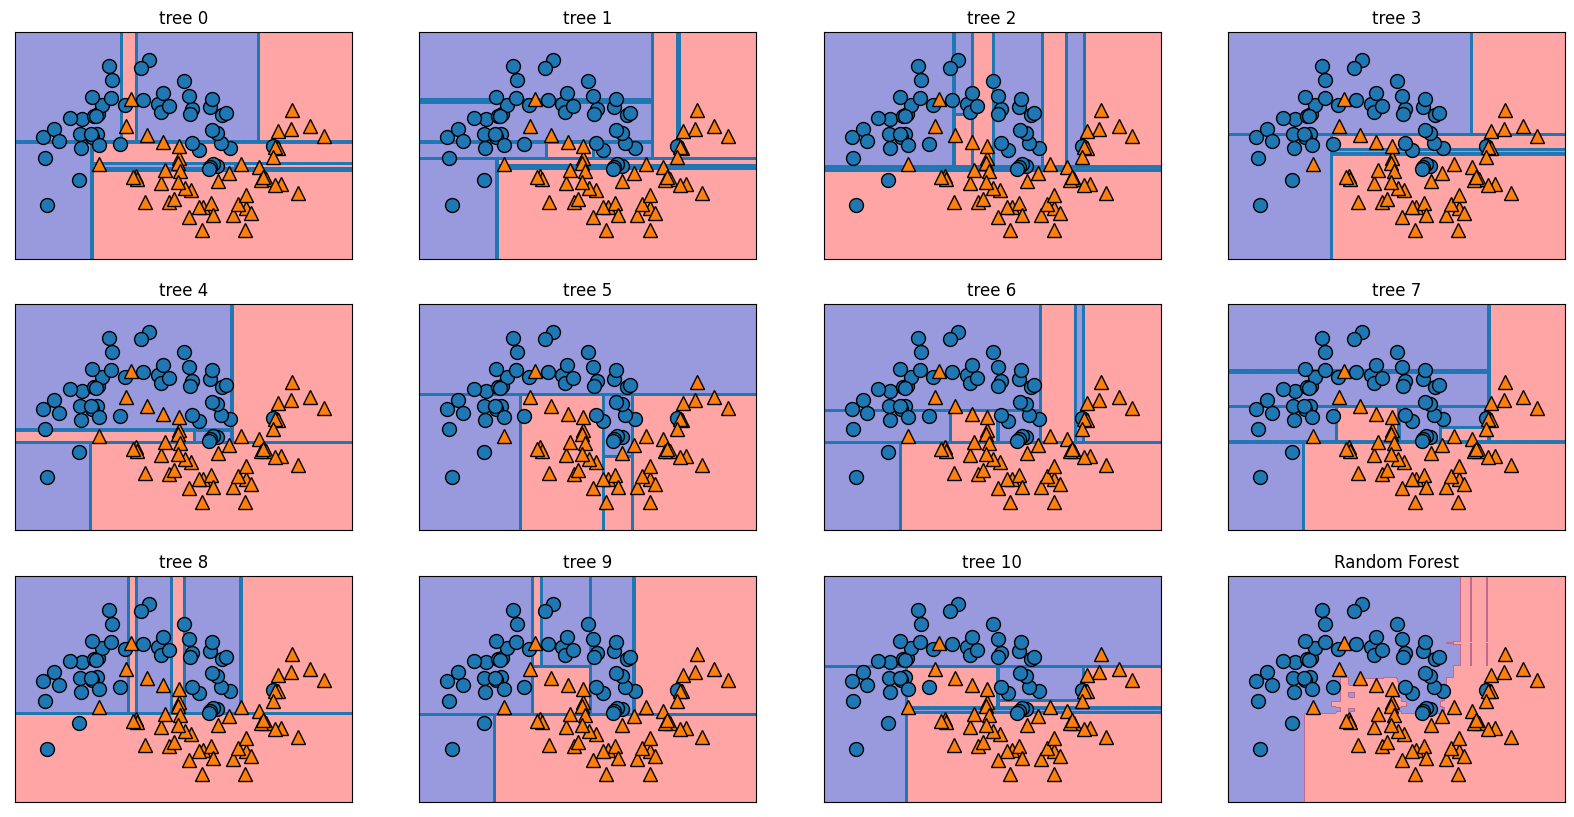

In [9]:
# n_estimators = 11, max_feature = 5 제한하기
forest = RandomForestClassifier(n_estimators=11, max_features=5, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


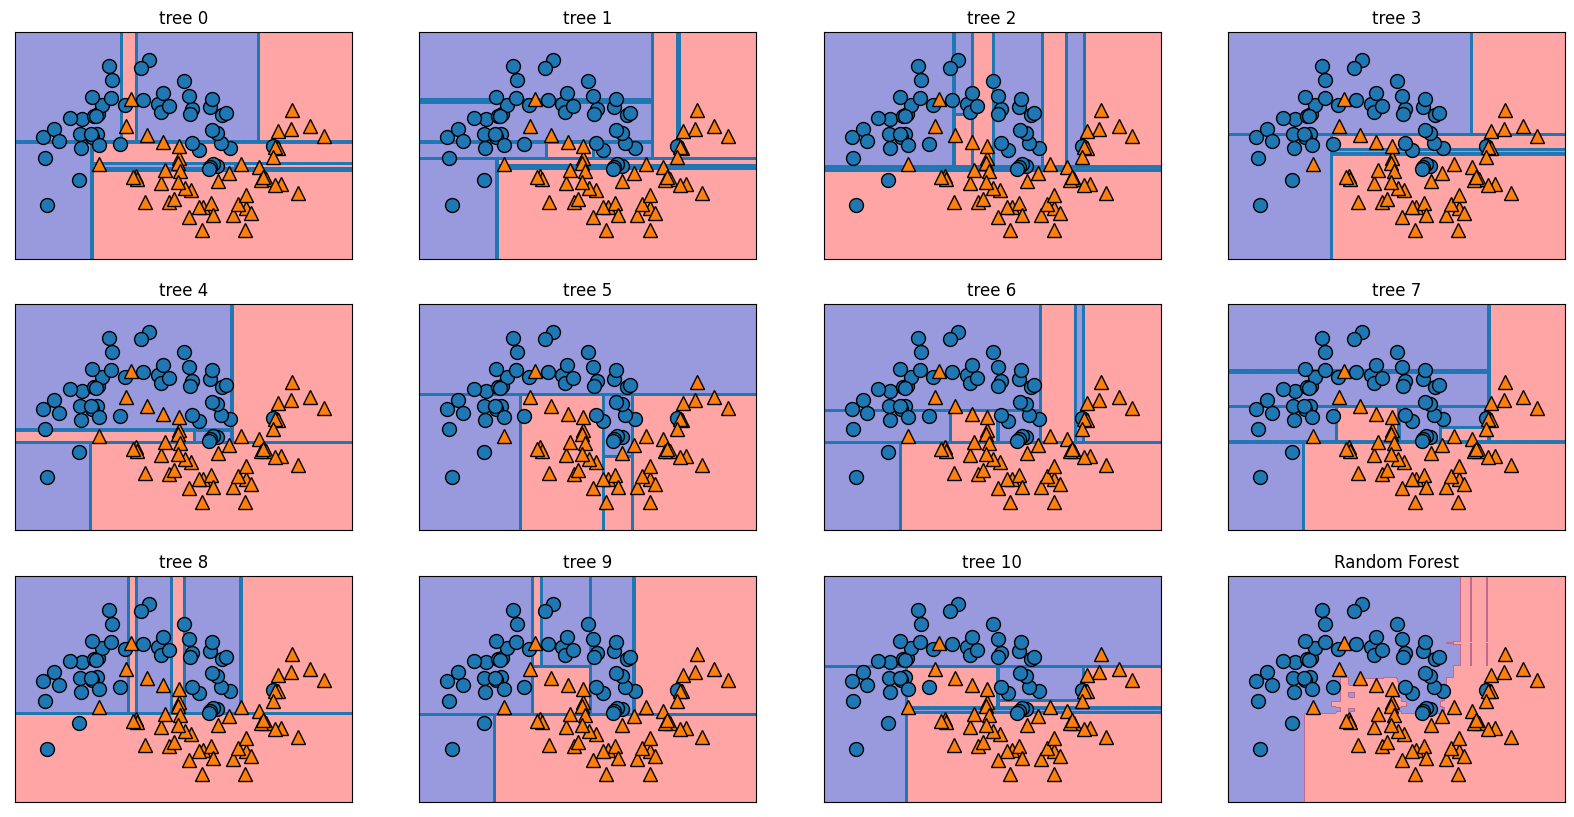

In [10]:
# n_estimators = 11, max_feature = 10 제한하기
forest = RandomForestClassifier(n_estimators=11, max_features=10, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


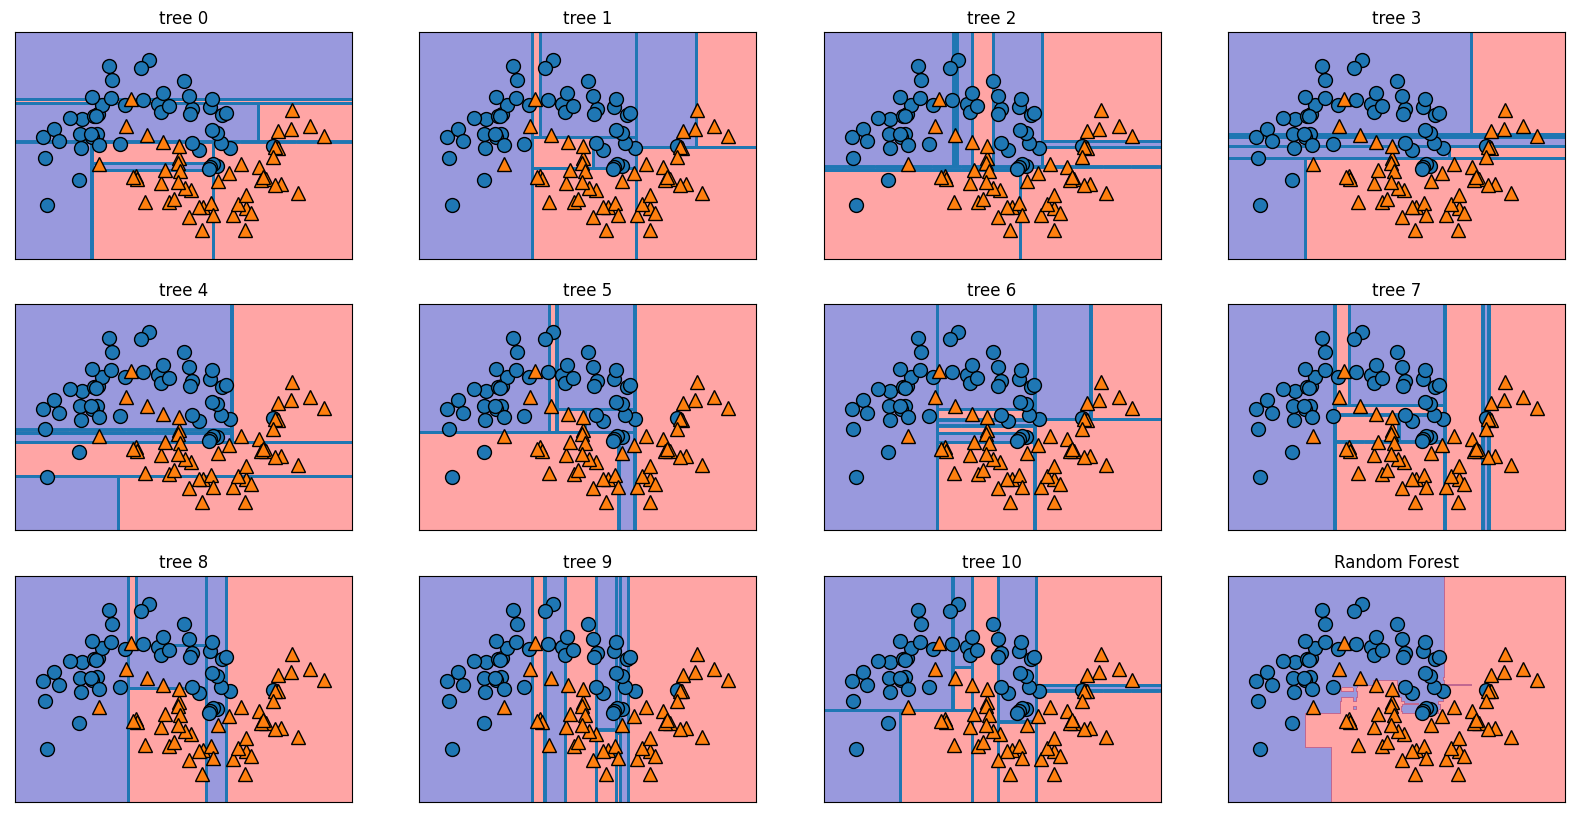

In [11]:
# n_estimators = 11, max_feature = 1 제한하기
forest = RandomForestClassifier(n_estimators=11, max_features=1, random_state=2)
forest.fit(X_train, y_train)

# 시각화
fig, axes = plt.subplots(3, 4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)


### 유방암 데이터 셋으로 랜덤 포레스트 적용

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("train data accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("test data accuracy: {:.3f}".format(forest.score(X_test, y_test)))

train data accuracy: 1.000
test data accuracy: 0.972


<AxesSubplot: >

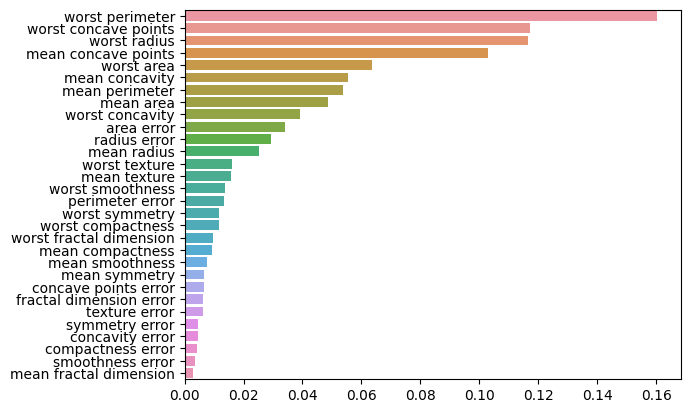

In [17]:
# 피처 중요도에 따른 시각화
import pandas as pd
import seaborn as sns

forest_series = pd.Series(forest.feature_importances_, index = cancer.feature_names)
forest_series = forest_series.sort_values(ascending=False)
sns.barplot(x=forest_series, y=forest_series.index)

### Gradient Boosting (GBM)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Train data accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test data accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

Train data accuracy: 1.000
Test data accuracy: 0.965


In [27]:
# 과대적합 방지하기 위해 max_depth 줄이기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Train data accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test data accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

Train data accuracy: 0.991
Test data accuracy: 0.972


In [23]:
# learning rate 조절하기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Train data accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test data accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))
# 처음보다 test accuracy가 낮아짐

Train data accuracy: 0.927
Test data accuracy: 0.958


<AxesSubplot: >

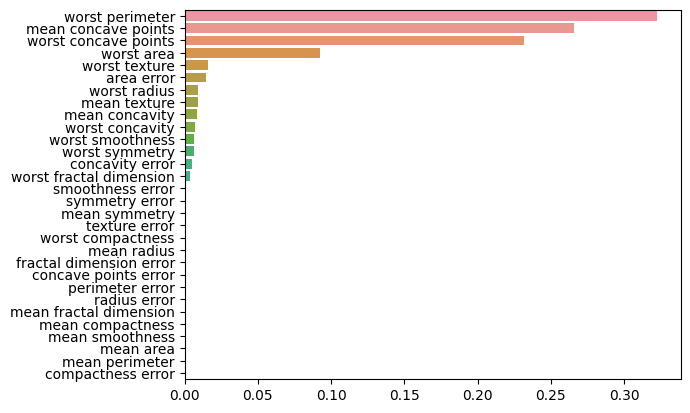

In [28]:
# importance features 시각화
import pandas as pd
import seaborn as sns

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

gbrt_series = pd.Series(gbrt.feature_importances_, index = cancer.feature_names)
gbrt_series = gbrt_series.sort_values(ascending=False)
sns.barplot(x=gbrt_series, y=gbrt_series.index)


In [29]:
gbrt.feature_importances_

array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
       3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
       0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
       4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
       9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
       6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
       6.41500790e-03, 3.42225071e-03])

### Bagging (Bootstrap aggregating)

In [1]:
# from preamble import *
# data load
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)


In [3]:
# bagging model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [4]:
print('train set accuracy :{0:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('test set accuracy :{0:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB sample accuracy:{0:.3f}'.format(bagging.oob_score_)) # 마지막에 언더바 넣어주기!

train set accuracy :0.962
test set accuracy :0.958
OOB sample accuracy:0.948


In [5]:
# 결정트리로 배깅 적용해보기. # 원래는 랜덤포레스트 이용하는게 편함
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
bagging = BaggingClassifier(dt_clf, n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

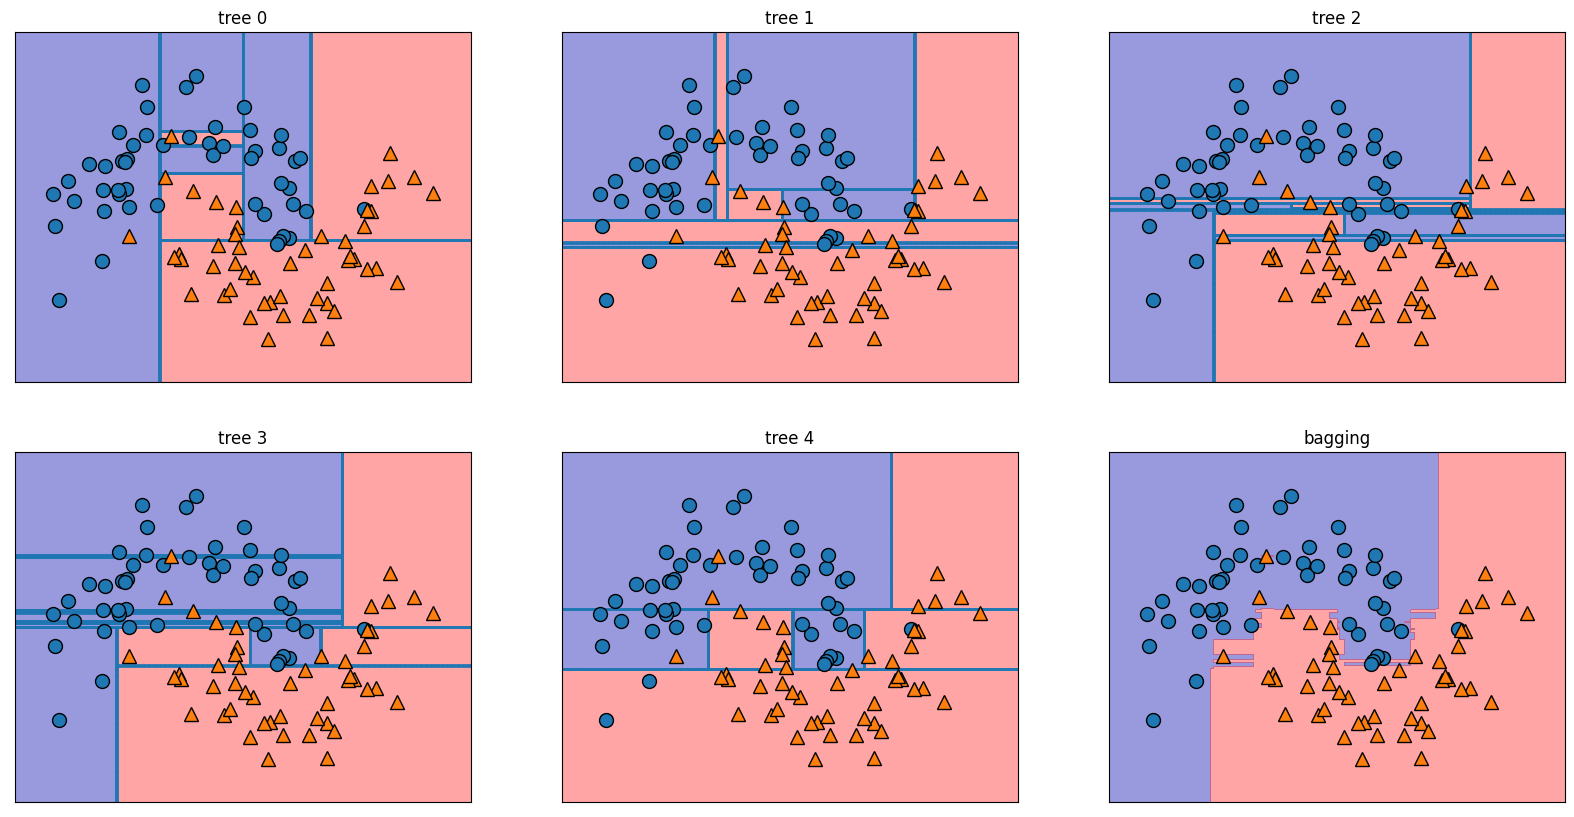

In [9]:
import mglearn
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title('bagging')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [10]:
# n_estimators = 100, cancer 데이터셋 훈련
bagging = BaggingClassifier(dt_clf, n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print('train set accuracy :{0:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('test set accuracy :{0:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB sample accuracy:{0:.3f}'.format(bagging.oob_score_)) # 마지막에 언더바 넣어주기!

train set accuracy :1.000
test set accuracy :0.965
OOB sample accuracy:0.948


### 그 외의 앙상블 기법

### Extra-Trees (엑스트라 트리)

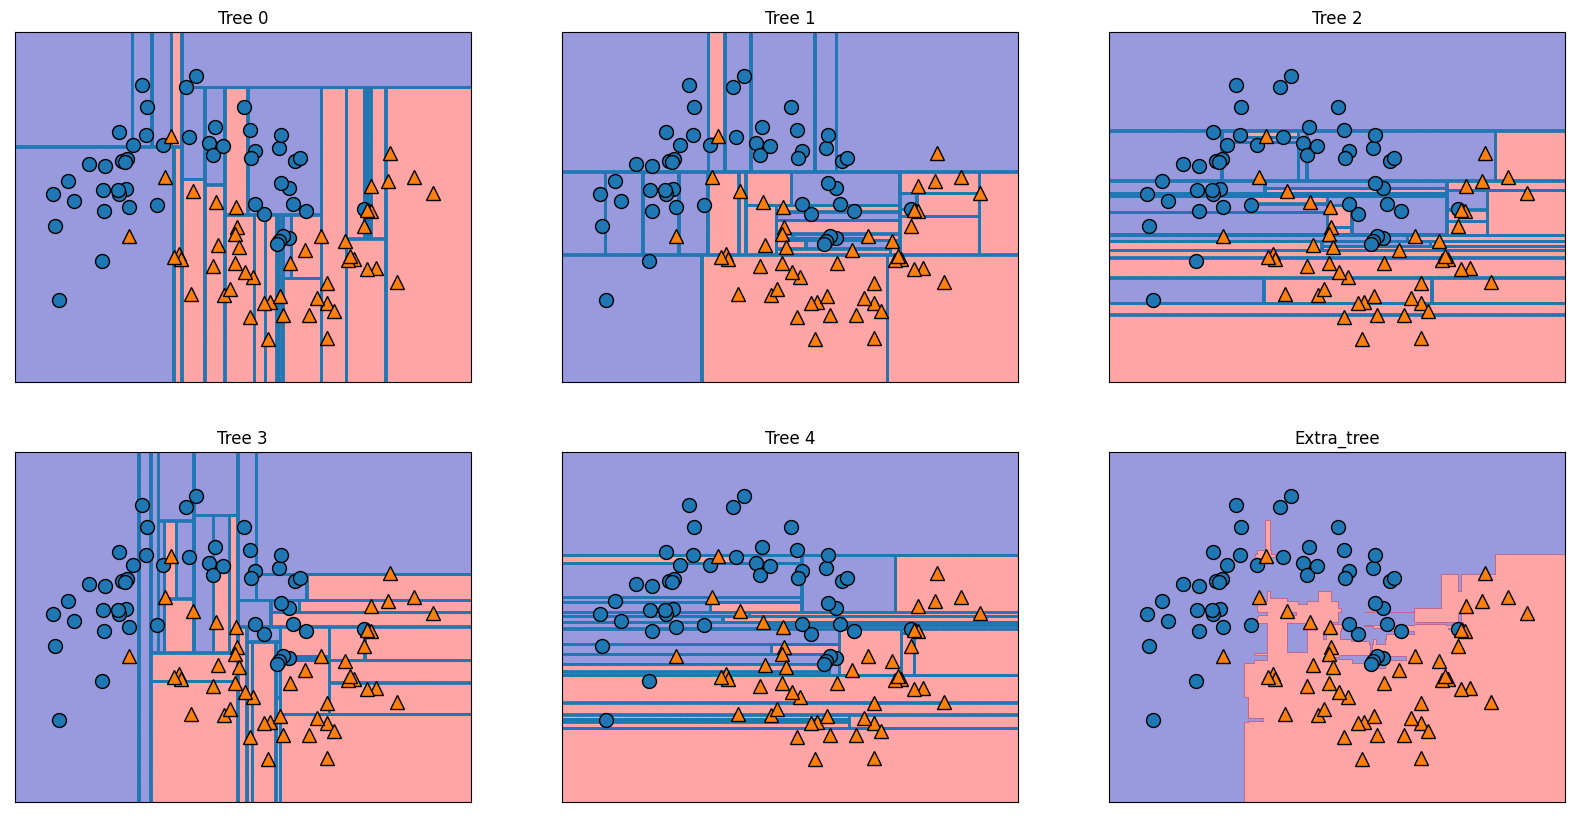

In [8]:
# two_moons dataset 적용
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
import mglearn
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('Extra_tree')
mglearn.discrete_scatter(Xm[:,0], Xm[:, 1], ym)
plt.show()

In [9]:
# cancer set 적용
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('train set accuracy: {0:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('test set accuracy: {0:.3f}'.format(xtree.score(Xc_test, yc_test)))


train set accuracy: 1.000
test set accuracy: 0.972


In [7]:
n_features = cancer.data.shape[1] # (569, 30)
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('features importance')
plt.ylabel('features')
plt.ylim(-1, n_features)
plt.show()

NameError: name 'xtree' is not defined

### AdaBoost

In [2]:
# two_moons dataset 적용
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train) 


AdaBoostClassifier(n_estimators=5, random_state=42)

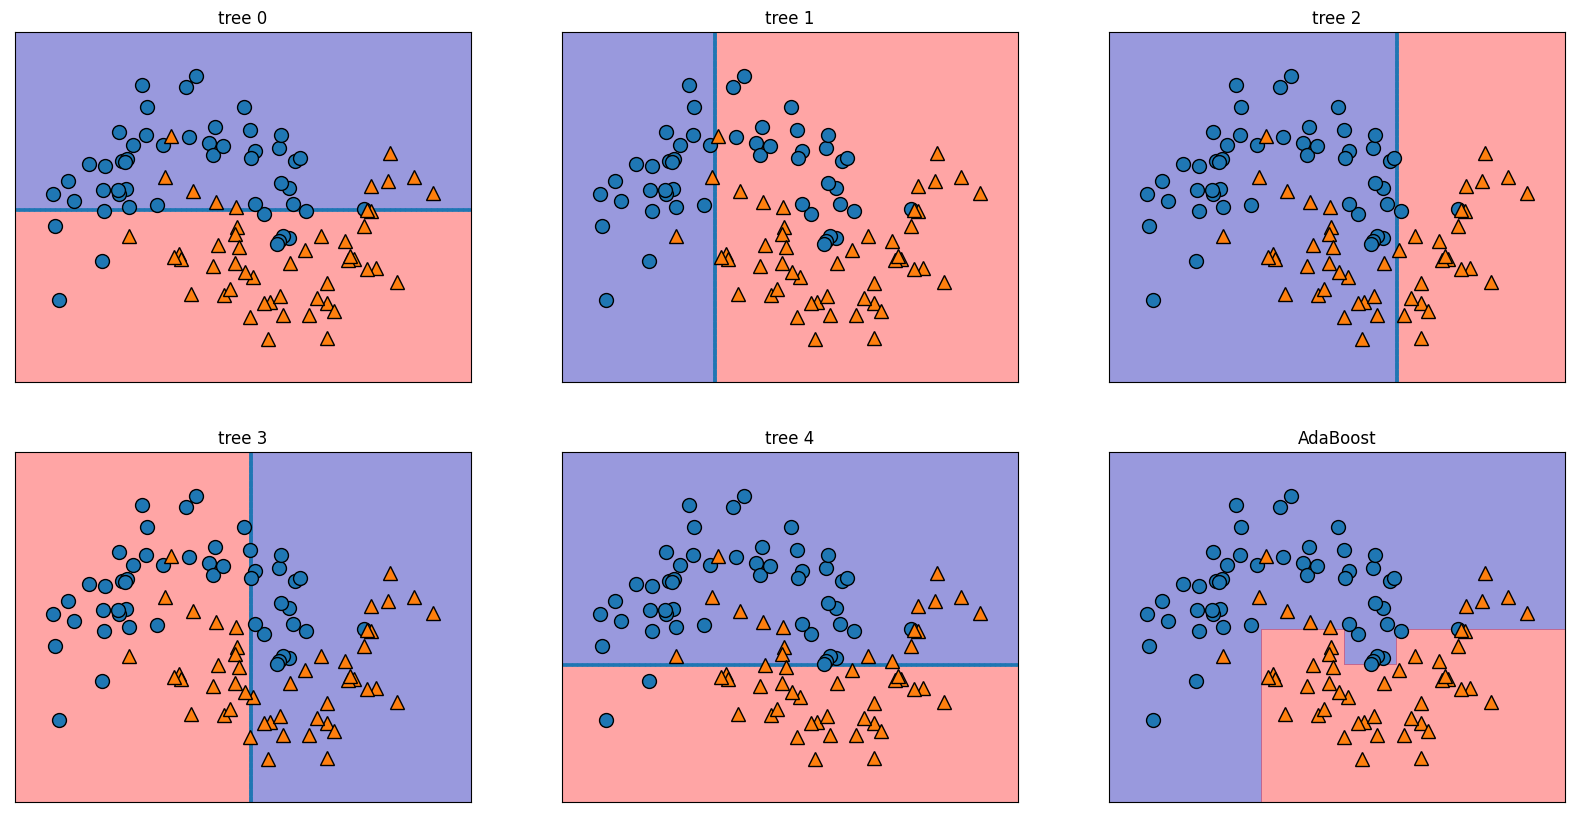

In [4]:
# 시각화하기
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('AdaBoost')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [5]:
# cancer dataset 적용
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print('train dataset accuracy: {0:.3f}'.format(ada.score(Xc_train, yc_train)))
print('test dataset accuracy: {0:.3f}'.format(ada.score(Xc_test, yc_test)))

train dataset accuracy: 1.000
test dataset accuracy: 0.986


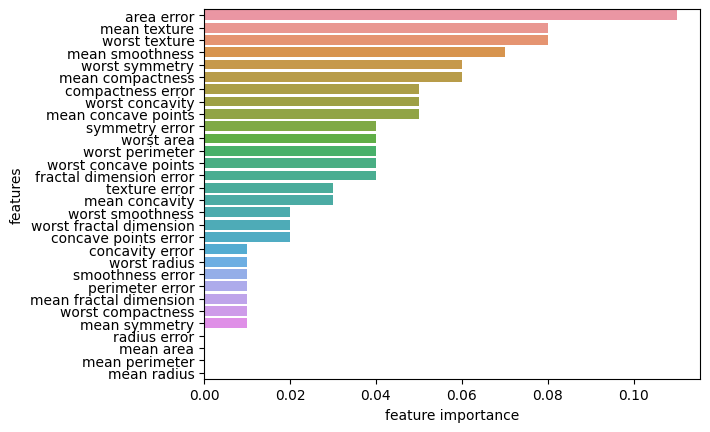

In [21]:
# AdaBoost에서 feature importance 확인
import numpy as np
import pandas as pd
import seaborn as sns
n_features = cancer.data.shape[1]

# Series로 먼저 만들기
features_importance = pd.Series(ada.feature_importances_, index=cancer.feature_names)
features_importance = features_importance.sort_values(ascending=False)
sns.barplot(x=features_importance, y=features_importance.index)
plt.xlabel('feature importance')
plt.ylabel('features')
plt.show()

# plt 이용하기 (정렬 안됨)
# plt.barh(range(n_features), ada.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), cancer.feature_names)
# plt.xlabel('feature importance')
# plt.ylabel('features')
# plt.ylim(-1, n_features)
# plt.show()

In [13]:
features_importance = pd.Series(ada.feature_importances_, index=cancer.feature_names)
features_importance = features_importance.sort_values(ascending=False)
features_importance

area error                 0.11
mean texture               0.08
worst texture              0.08
mean smoothness            0.07
worst symmetry             0.06
mean compactness           0.06
compactness error          0.05
worst concavity            0.05
mean concave points        0.05
symmetry error             0.04
worst area                 0.04
worst perimeter            0.04
worst concave points       0.04
fractal dimension error    0.04
texture error              0.03
mean concavity             0.03
worst smoothness           0.02
worst fractal dimension    0.02
concave points error       0.02
concavity error            0.01
worst radius               0.01
smoothness error           0.01
perimeter error            0.01
mean fractal dimension     0.01
worst compactness          0.01
mean symmetry              0.01
radius error               0.00
mean area                  0.00
mean perimeter             0.00
mean radius                0.00
dtype: float64

### HistGradientBoosting

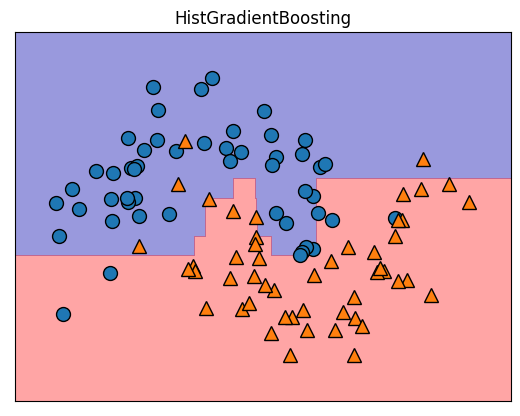

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xm_train, ym_train)

mglearn.plots.plot_2d_separator(hgb, Xm, fill=True, alpha=.4)
plt.title('HistGradientBoosting')
mglearn.discrete_scatter(Xm[:,0], Xm[:, 1], ym)
plt.show()

In [23]:
# cancer dataset 사용
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xc_train, yc_train)

print("Train dataset accuracy: {0:.3f}".format(hgb.score(Xc_train, yc_train)))
print("Test dataset accuracy: {0:.3f}".format(hgb.score(Xc_test, yc_test)))

Train dataset accuracy: 1.000
Test dataset accuracy: 0.979


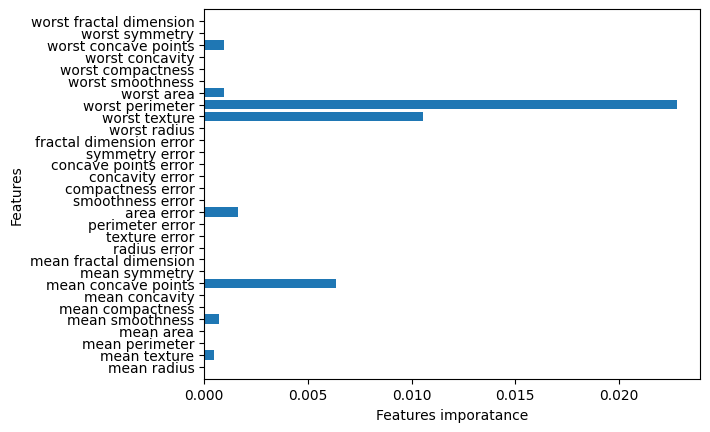

In [25]:
# feature importance 구하기
# permutation_imporatance 함수 이용
from sklearn.inspection import permutation_importance

result = permutation_importance(hgb, Xc_train, yc_train, n_repeats=10, random_state=42, n_jobs=-1)

plt.barh(range(n_features), result.importances_mean, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Features imporatance')
plt.ylabel('Features')
plt.ylim(-1, n_features)
plt.show()